# data load and start

In [ ]:
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Tweet_Large.csv')
#df

In [ ]:
selected_columns = ['post_date', 'body']
df = df[selected_columns]

In [ ]:
nasdaq = pd.read_csv('/content/drive/MyDrive/Prices.csv')

In [ ]:
selected_columns = ['Date', 'Close']
nasdaq = nasdaq[selected_columns]

# Epoch to time and column reduction

In [ ]:
import datetime

In [ ]:
df['post_date'] = pd.to_datetime(df['post_date'], unit='s')

In [ ]:
df['Date'] = pd.to_datetime(df['post_date']).dt.date
#df

In [ ]:
selected_columns = ['Date', 'body']
df = df[selected_columns]

# TextBlob

In [ ]:
from textblob import TextBlob
from textblob import Word

In [ ]:
textblob = df.iloc[:300000]
#textblob

In [ ]:
sentiment = textblob['body'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

In [ ]:
textblob["sentiment"] = sentiment

<ipython-input-201-7c3f8f45bb63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textblob["sentiment"] = sentiment


In [ ]:
textblob['sentiment_label'] = textblob['sentiment'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))


<ipython-input-202-27e233d92192>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textblob['sentiment_label'] = textblob['sentiment'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))


# Vader

In [ ]:
!pip install nltk
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

In [ ]:
vader = df.iloc[:300000]
#vader

In [ ]:
vader['Date'] = pd.to_datetime(vader['Date']).dt.date
tweet_counts = vader.groupby('Date').size().reset_index(name='Tweet Count')

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
def get_sentiment_scores(text):
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores

In [ ]:
vader['sentiment_scores'] = vader['body'].apply(get_sentiment_scores)

In [ ]:
vader['sentiment_scores']

In [ ]:
compound_scores = vader['sentiment_scores'].apply(lambda scores: scores['compound'])
vader['sentiment_scores'] = compound_scores

In [ ]:
vader['sentiment_label'] = vader['sentiment_scores'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

# BOW

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# pre-process for textblob

In [ ]:
# Step 1: Lowercasing
textblob['body'] = textblob['body'].apply(lambda text: text.lower())

<ipython-input-213-30d5b7734e4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textblob['body'] = textblob['body'].apply(lambda text: text.lower())


In [ ]:
# Step 2: Removing Punctuation
textblob['body'] = textblob['body'].apply(lambda text: text.translate(str.maketrans('', '', string.punctuation)))

<ipython-input-214-9edcfdd9e878>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textblob['body'] = textblob['body'].apply(lambda text: text.translate(str.maketrans('', '', string.punctuation)))


In [ ]:
# Step 3: Tokenization
textblob['tokens'] = textblob['body'].apply(lambda text: word_tokenize(text))

<ipython-input-215-1fdcaea31889>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textblob['tokens'] = textblob['body'].apply(lambda text: word_tokenize(text))


In [ ]:
stop_words = set(stopwords.words('english'))
textblob['filtered_tokens'] = textblob['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

<ipython-input-216-098cad13a0d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textblob['filtered_tokens'] = textblob['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])


In [ ]:
lemmatizer = WordNetLemmatizer()
textblob['lemmatized_tokens'] = textblob['filtered_tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

<ipython-input-217-5ea529901e4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textblob['lemmatized_tokens'] = textblob['filtered_tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])


In [ ]:
# Step 6: Join Tokens
textblob['preprocessed_text'] = textblob['lemmatized_tokens'].apply(lambda tokens:' '.join(tokens))

<ipython-input-218-e4757701ebd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textblob['preprocessed_text'] = textblob['lemmatized_tokens'].apply(lambda tokens:' '.join(tokens))


# pre-process for vader

In [ ]:
# Step 1: Lowercasing
vader['body'] = vader['body'].apply(lambda text: text.lower())
# Step 2: Removing Punctuation
#this makes us delete things like %8.91 to 891 which dont make sense?
vader['body'] = vader['body'].apply(lambda text: text.translate(str.maketrans('', '', string.punctuation)))
# Step 3: Tokenization

vader['tokens'] = vader['body'].apply(lambda text: word_tokenize(text))
stop_words = set(stopwords.words('english'))
vader['filtered_tokens'] = vader['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

lemmatizer = WordNetLemmatizer()
vader['lemmatized_tokens'] = vader['filtered_tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

# Step 6: Join Tokens
vader['preprocessed_text'] = vader['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))


# Model for textblob

In [ ]:
# Split data into training and testing sets
#train_df, test_df = train_test_split(textblob, test_size=0.2, random_state=42)

In [ ]:
num_rows = int(0.3 * len(textblob))
train_df = textblob[-num_rows:]
test_df = textblob[:-num_rows]

In [ ]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df['preprocessed_text'])
X_test = vectorizer.transform(test_df['preprocessed_text'])

In [ ]:
# Training a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, train_df['sentiment_label'])

MultinomialNB()

In [ ]:
predictions = classifier.predict(X_test)

accuracy = accuracy_score(test_df['sentiment_label'], predictions)
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(test_df['sentiment_label'],
                               predictions)
print(report)

Accuracy: 0.77
              precision    recall  f1-score   support

    negative       0.74      0.32      0.44     23659
     neutral       0.90      0.76      0.82    108421
    positive       0.66      0.92      0.77     77920

    accuracy                           0.77    210000
   macro avg       0.77      0.66      0.68    210000
weighted avg       0.79      0.77      0.76    210000



In [ ]:
test_df['predicted_sentiment'] = predictions
bow_textblob = test_df


# Model for vader

In [ ]:
# Split data into training and testing sets
#train_df, test_df = train_test_split(vader, test_size=0.2, random_state=42)

In [ ]:
# Calculate the number of rows corresponding to 20 percent
num_rows = int(0.3 * len(vader))  # 20% of the total number of rows

# Get the last 'num_rows' rows for training
train_df = vader[-num_rows:]

# The remaining rows will be for testing
test_df = vader[:-num_rows]


In [ ]:
# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Apply CountVectorizer to training and testing text data
X_train = vectorizer.fit_transform(train_df['preprocessed_text'])
X_test = vectorizer.transform(test_df['preprocessed_text'])


In [ ]:
# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, train_df['sentiment_label'])


MultinomialNB()

In [ ]:
# Predict sentiment labels on the testing set
predictions = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(test_df['sentiment_label'], predictions)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
report = classification_report(test_df['sentiment_label'], predictions)
print(report)


Accuracy: 0.78
              precision    recall  f1-score   support

    negative       0.68      0.51      0.58     30374
     neutral       0.90      0.76      0.82    102026
    positive       0.69      0.90      0.78     77600

    accuracy                           0.78    210000
   macro avg       0.76      0.72      0.73    210000
weighted avg       0.79      0.78      0.77    210000



In [ ]:
test_df['predicted_sentiment'] = predictions
bow_vader = test_df


<ipython-input-232-7120d5d13e70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predicted_sentiment'] = predictions


# graphs for vader

In [ ]:
vader

In [ ]:
#this is to be usedfor the first pipeline of 300.000 data
#nasdaq = nasdaq[:97]
# this is to be used for the second pipeline of 300.000 data
#nasdaq = nasdaq[97:196]
nasdaq

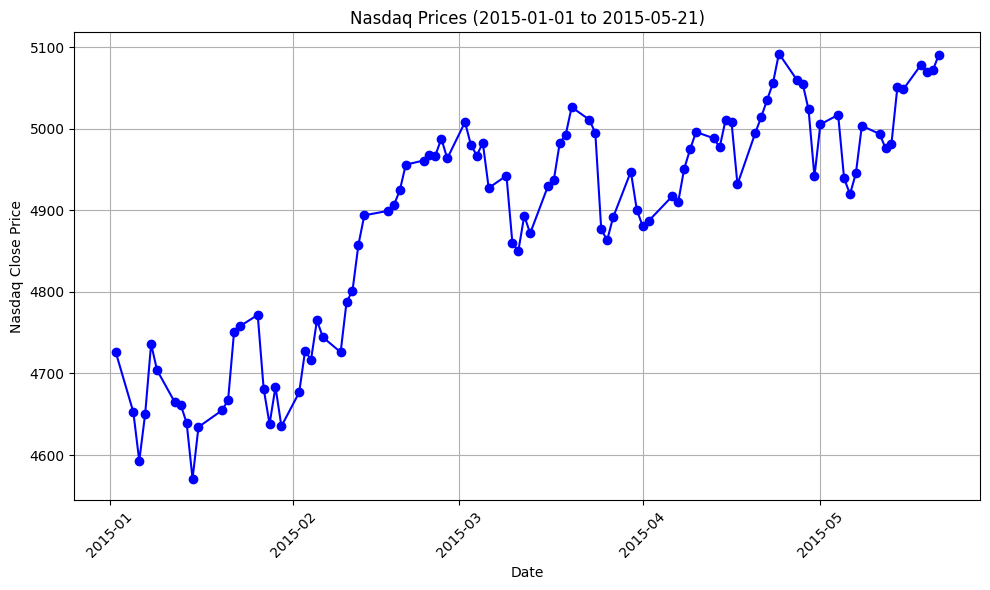

In [ ]:
# date range
start_date = pd.Timestamp('2015-01-01').date()
end_date = pd.Timestamp('2015-05-21').date()
nasdaq['Date'] = pd.to_datetime(nasdaq['Date']).dt.date
# Filter data for the specified date range
nasdaq_filtered = nasdaq[(nasdaq['Date'] >= start_date) & (nasdaq['Date'] <= end_date)]
# line plot of Nasdaq prices
plt.figure(figsize=(10, 6))
plt.plot(nasdaq_filtered['Date'], nasdaq_filtered['Close'], marker='o',color='blue')
plt.xlabel('Date')
plt.ylabel('Nasdaq Close Price')
plt.title('Nasdaq Prices (2015-01-01 to 2015-05-21)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

In [ ]:
# Convert 'Date' column to datetime type
vader['Date'] = pd.to_datetime(vader['Date']).dt.date
# Group by 'Date' and 'sentiment_label' and calculate counts
grouped = vader.groupby(['Date', 'sentiment_label']).size().reset_index(name='count')
# Pivot the table to get sentiment labels as columns
pivot_table = grouped.pivot(index='Date', columns='sentiment_label',values='count').fillna(0)
# Calculate total counts for each day
pivot_table['total'] = pivot_table.sum(axis=1)
# Calculate daily probabilities for each sentiment label
sentiment_labels = ['positive', 'negative', 'neutral']
for label in sentiment_labels:
    pivot_table[label + '_prob'] = pivot_table[label] / pivot_table['total']
# Normalize probabilities to get an aggregated value from 0 to 1
normalized_probs = pivot_table[sentiment_labels].div(pivot_table[sentiment_labels].sum(axis=1), axis=0)
#print(normalized_probs)

<ipython-input-263-a0b3571048eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vader['Date'] = pd.to_datetime(vader['Date']).dt.date


In [ ]:
merged_df = pd.merge(nasdaq, normalized_probs,
                     left_on='Date', right_index=True, how='left')

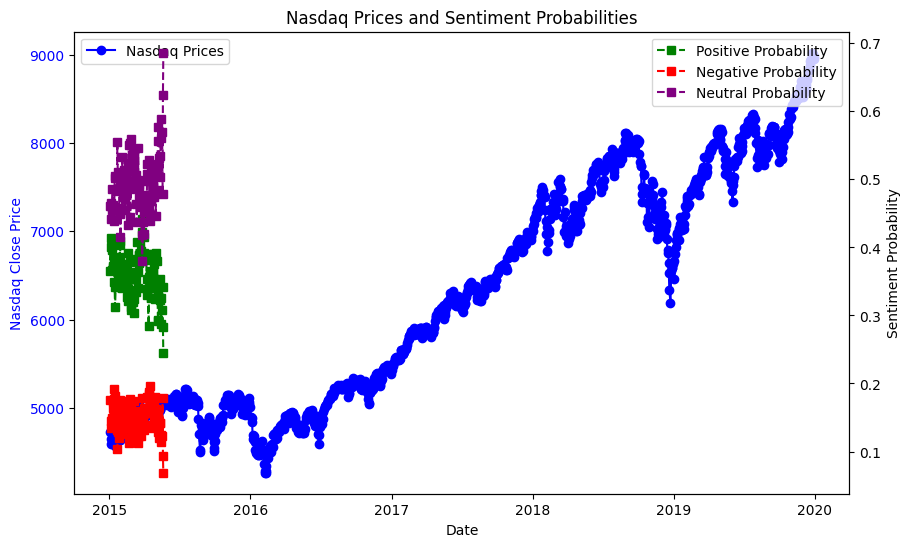

In [ ]:
#merging price and the probabilties
merged_df = pd.merge(nasdaq, normalized_probs,
                     left_on='Date', right_index=True, how='left')

merged_df['Date'] = pd.to_datetime(merged_df['Date']).dt.date
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))
# Plot Nasdaq prices on the left y-axis (ax1)
ax1.plot(merged_df['Date'], merged_df['Close'], color='blue', marker='o',
         label='Nasdaq Prices')
ax1.set_xlabel('Date')
ax1.set_ylabel('Nasdaq Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')
# Create a second y-axis for sentiment probabilities
ax2 = ax1.twinx()
# Plot sentiment probabilities on the right y-axis (ax2)
ax2.plot(merged_df['Date'], merged_df['positive'], color='green',
         linestyle='dashed', marker='s', label='Positive Probability')
ax2.plot(merged_df['Date'], merged_df['negative'], color='red',
         linestyle='dashed', marker='s', label='Negative Probability')
ax2.plot(merged_df['Date'], merged_df['neutral'], color='purple',
         linestyle='dashed', marker='s', label='Neutral Probability')
ax2.set_ylabel('Sentiment Probability', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right')
# Add a title and legend
plt.title('Nasdaq Prices and Sentiment Probabilities')
plt.legend()


In [ ]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df.set_index('Date', inplace=True)
# Calculate binary indicators for price and positive probability changes
merged_df['price_change'] = merged_df['Close'].diff()
merged_df['positive_change'] = merged_df['positive'].diff()
merged_df['price_increase'] = (merged_df['price_change'] > 0).astype(int)
merged_df['positive_increase'] = (merged_df['positive_change'] > 0).astype(int)
merged_df['price_decrease'] = (merged_df['price_change'] < 0).astype(int)
merged_df['positive_decrease'] = (merged_df['positive_change'] < 0).astype(int)

# Resample data to weekly frequency and calculate weekly aggregates
weekly_price_increase = merged_df['price_increase'].resample('W').sum()
weekly_price_decrease = merged_df['price_decrease'].resample('W').sum()
weekly_positive_increase = merged_df['positive_increase'].resample('W').sum()
weekly_positive_decrease = merged_df['positive_decrease'].resample('W').sum()

# Calculate correlations
correlation_increase = np.corrcoef(weekly_price_increase, weekly_positive_increase)[0, 1]
correlation_decrease = np.corrcoef(weekly_price_decrease, weekly_positive_decrease)[0, 1]
mix = np.corrcoef(weekly_price_increase, weekly_positive_decrease)[0, 1]
print(f"Correlation between Weekly Price Increase and Positive Probability Increase: {correlation_increase}")
print(f"Correlation between Weekly Price Decrease and Positive Probability Decrease: {correlation_decrease}")


Correlation between Weekly Price Increase and Positive Probability Increase: -0.020001747769920343
Correlation between Weekly Price Decrease and Positive Probability Decrease: -0.005115357502906052


In [ ]:
first_month = merged_df[1:20]
second_month =merged_df[20:40]
third_month =merged_df[40:60]

In [ ]:
first_month['Date'] = pd.to_datetime(first_month['Date'])
first_month.set_index('Date', inplace=True)

# Calculate binary indicators for price and positive probability changes
first_month['price_change'] = first_month['Close'].diff()
first_month['positive_change'] = first_month['positive'].diff()
first_month['price_increase'] = (first_month['price_change'] > 0).astype(int)
first_month['positive_increase'] = (first_month['positive_change'] > 0).astype(int)
first_month['price_decrease'] = (first_month['price_change'] < 0).astype(int)
first_month['positive_decrease'] = (first_month['positive_change'] < 0).astype(int)

# Resample data to weekly frequency and calculate weekly aggregates
weekly_price_increase = first_month['price_increase'].resample('W').sum()
weekly_price_decrease = first_month['price_decrease'].resample('W').sum()
weekly_positive_increase = first_month['positive_increase'].resample('W').sum()
weekly_positive_decrease = first_month['positive_decrease'].resample('W').sum()

# Calculate correlations
correlation_increase = np.corrcoef(weekly_price_increase, weekly_positive_increase)[0, 1]
correlation_decrease = np.corrcoef(weekly_price_decrease, weekly_positive_decrease)[0, 1]
mix = np.corrcoef(weekly_price_increase, weekly_positive_decrease)[0, 1]
print(f"Correlation between Weekly Price Increase and Positive Probability Increase: {correlation_increase}")
print(f"Correlation between Weekly Price Decrease and Positive Probability Decrease: {correlation_decrease}")


In [ ]:
second_month['Date'] = pd.to_datetime(second_month['Date'])
second_month.set_index('Date', inplace=True)

# Calculate binary indicators for price and positive probability changes
second_month['price_change'] = second_month['Close'].diff()
second_month['positive_change'] = second_month['positive'].diff()
second_month['price_increase'] = (second_month['price_change'] > 0).astype(int)
second_month['positive_increase'] = (second_month['positive_change'] > 0).astype(int)
second_month['price_decrease'] = (second_month['price_change'] < 0).astype(int)
second_month['positive_decrease'] = (second_month['positive_change'] < 0).astype(int)

# Resample data to weekly frequency and calculate weekly aggregates
weekly_price_increase = second_month['price_increase'].resample('W').sum()
weekly_price_decrease = second_month['price_decrease'].resample('W').sum()
weekly_positive_increase = second_month['positive_increase'].resample('W').sum()
weekly_positive_decrease = second_month['positive_decrease'].resample('W').sum()

# Calculate correlations
correlation_increase = np.corrcoef(weekly_price_increase, weekly_positive_increase)[0, 1]
correlation_decrease = np.corrcoef(weekly_price_decrease, weekly_positive_decrease)[0, 1]
mix = np.corrcoef(weekly_price_increase, weekly_positive_decrease)[0, 1]
print(f"Correlation between Weekly Price Increase and Positive Probability Increase: {correlation_increase}")
print(f"Correlation between Weekly Price Decrease and Positive Probability Decrease: {correlation_decrease}")


In [ ]:
third_month['Date'] = pd.to_datetime(third_month['Date'])
third_month.set_index('Date', inplace=True)

# Calculate binary indicators for price and positive probability changes
third_month['price_change'] = third_month['Close'].diff()
third_month['positive_change'] = third_month['positive'].diff()
third_month['price_increase'] = (third_month['price_change'] > 0).astype(int)
third_month['positive_increase'] = (third_month['positive_change'] > 0).astype(int)
third_month['price_decrease'] = (third_month['price_change'] < 0).astype(int)
third_month['positive_decrease'] = (third_month['positive_change'] < 0).astype(int)

# Resample data to weekly frequency and calculate weekly aggregates
weekly_price_increase = third_month['price_increase'].resample('W').sum()
weekly_price_decrease = third_month['price_decrease'].resample('W').sum()
weekly_positive_increase = third_month['positive_increase'].resample('W').sum()
weekly_positive_decrease = third_month['positive_decrease'].resample('W').sum()

# Calculate correlations
correlation_increase = np.corrcoef(weekly_price_increase, weekly_positive_increase)[0, 1]
correlation_decrease = np.corrcoef(weekly_price_decrease, weekly_positive_decrease)[0, 1]
mix = np.corrcoef(weekly_price_increase, weekly_positive_decrease)[0, 1]
print(f"Correlation between Weekly Price Increase and Positive Probability Increase: {correlation_increase}")
print(f"Correlation between Weekly Price Decrease and Positive Probability Decrease: {correlation_decrease}")


# graphs for textblob

In [ ]:
# Define the date range
start_date = pd.Timestamp('2015-05-21').date()
end_date = pd.Timestamp('2015-10-12').date()

nasdaq['Date'] = pd.to_datetime(nasdaq['Date']).dt.date

# Filter data for the specified date range
nasdaq_filtered = nasdaq[(nasdaq['Date'] >= start_date) & (nasdaq['Date'] <= end_date)]

# Create a line plot of Nasdaq prices
plt.figure(figsize=(10, 6))
plt.plot(nasdaq_filtered['Date'], nasdaq_filtered['Close'], marker='o', color='blue')
plt.xlabel('Date')
plt.ylabel('Nasdaq Close Price')
plt.title('Nasdaq Prices (2015-05-21 to 2015-10-12)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Convert 'Date' column to datetime type
textblob['Date'] = pd.to_datetime(textblob['Date']).dt.date

# Group by 'Date' and 'sentiment_label' and calculate counts
grouped = textblob.groupby(['Date', 'sentiment_label']).size().reset_index(name='count')

# Pivot the table to get sentiment labels as columns
pivot_table = grouped.pivot(index='Date', columns='sentiment_label', values='count').fillna(0)

# Calculate total counts for each day
pivot_table['total'] = pivot_table.sum(axis=1)

# Calculate daily probabilities for each sentiment label
sentiment_labels = ['positive', 'negative', 'neutral']
for label in sentiment_labels:
    pivot_table[label + '_prob'] = pivot_table[label] / pivot_table['total']

# Normalize probabilities to get an aggregated value from 0 to 1
normalized_probs = pivot_table[sentiment_labels].div(pivot_table[sentiment_labels].sum(axis=1), axis=0)

# Print the normalized probabilities
print(normalized_probs)

In [ ]:
merged_df = pd.merge(nasdaq, normalized_probs, left_on='Date', right_index=True, how='left')
#merged_df

In [ ]:
#merged_df = merged_df.iloc[:33]

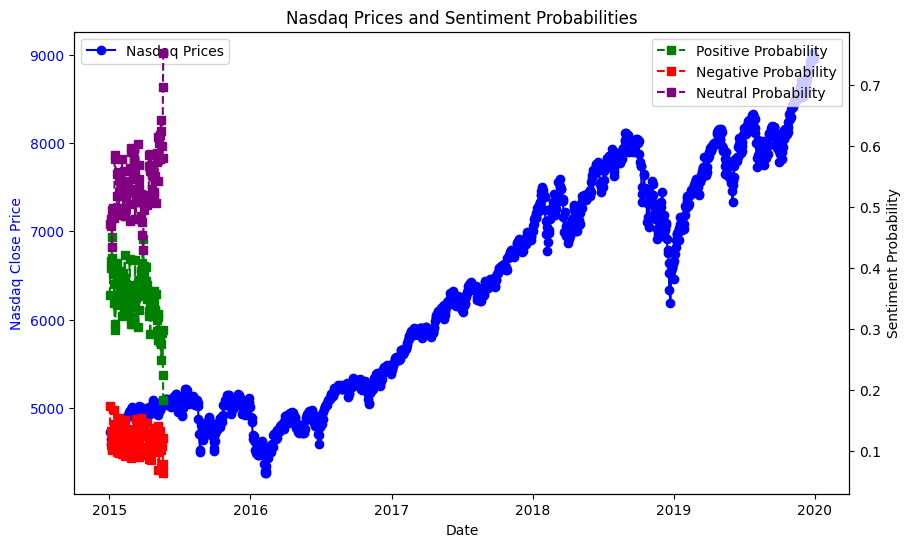

In [ ]:
merged_df['Date'] = pd.to_datetime(merged_df['Date']).dt.date

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Nasdaq prices on the left y-axis (ax1)
ax1.plot(merged_df['Date'], merged_df['Close'], color='blue', marker='o', label='Nasdaq Prices')
ax1.set_xlabel('Date')
ax1.set_ylabel('Nasdaq Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a second y-axis for sentiment probabilities
ax2 = ax1.twinx()

# Plot sentiment probabilities on the right y-axis (ax2)
ax2.plot(merged_df['Date'], merged_df['positive'], color='green', linestyle='dashed', marker='s', label='Positive Probability')
ax2.plot(merged_df['Date'], merged_df['negative'], color='red', linestyle='dashed', marker='s', label='Negative Probability')
ax2.plot(merged_df['Date'], merged_df['neutral'], color='purple', linestyle='dashed', marker='s', label='Neutral Probability')
ax2.set_ylabel('Sentiment Probability', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right')

# Add a title and legend
plt.title('Nasdaq Prices and Sentiment Probabilities')
plt.legend()


In [ ]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df.set_index('Date', inplace=True)
# Calculate binary indicators for price and positive probability changes
merged_df['price_change'] = merged_df['Close'].diff()
merged_df['positive_change'] = merged_df['positive'].diff()
merged_df['price_increase'] = (merged_df['price_change'] > 0).astype(int)
merged_df['positive_increase'] = (merged_df['positive_change'] > 0).astype(int)
merged_df['price_decrease'] = (merged_df['price_change'] < 0).astype(int)
merged_df['positive_decrease'] = (merged_df['positive_change'] < 0).astype(int)

# Resample data to weekly frequency and calculate weekly aggregates
weekly_price_increase = merged_df['price_increase'].resample('W').sum()
weekly_price_decrease = merged_df['price_decrease'].resample('W').sum()
weekly_positive_increase = merged_df['positive_increase'].resample('W').sum()
weekly_positive_decrease = merged_df['positive_decrease'].resample('W').sum()

# Calculate correlations
correlation_increase = np.corrcoef(weekly_price_increase, weekly_positive_increase)[0, 1]
correlation_decrease = np.corrcoef(weekly_price_decrease, weekly_positive_decrease)[0, 1]
mix = np.corrcoef(weekly_price_increase, weekly_positive_decrease)[0, 1]
print(f"Correlation between Weekly Price Increase and Positive Probability Increase: {correlation_increase}")
print(f"Correlation between Weekly Price Decrease and Positive Probability Decrease: {correlation_decrease}")


Correlation between Weekly Price Increase and Positive Probability Increase: 0.03054824051583095
Correlation between Weekly Price Decrease and Positive Probability Decrease: 0.039447143014946826


In [ ]:
first_month = merged_df[1:20]
second_month =merged_df[20:40]
third_month =merged_df[40:60]

In [ ]:
first_month['Date'] = pd.to_datetime(first_month['Date'])
first_month.set_index('Date', inplace=True)

# Calculate binary indicators for price and positive probability changes
first_month['price_change'] = first_month['Close'].diff()
first_month['positive_change'] = first_month['positive'].diff()
first_month['price_increase'] = (first_month['price_change'] > 0).astype(int)
first_month['positive_increase'] = (first_month['positive_change'] > 0).astype(int)
first_month['price_decrease'] = (first_month['price_change'] < 0).astype(int)
first_month['positive_decrease'] = (first_month['positive_change'] < 0).astype(int)

# Resample data to weekly frequency and calculate weekly aggregates
weekly_price_increase = first_month['price_increase'].resample('W').sum()
weekly_price_decrease = first_month['price_decrease'].resample('W').sum()
weekly_positive_increase = first_month['positive_increase'].resample('W').sum()
weekly_positive_decrease = first_month['positive_decrease'].resample('W').sum()

# Calculate correlations
correlation_increase = np.corrcoef(weekly_price_increase, weekly_positive_increase)[0, 1]
correlation_decrease = np.corrcoef(weekly_price_decrease, weekly_positive_decrease)[0, 1]
mix = np.corrcoef(weekly_price_increase, weekly_positive_decrease)[0, 1]
print(f"Correlation between Weekly Price Increase and Positive Probability Increase: {correlation_increase}")
print(f"Correlation between Weekly Price Decrease and Positive Probability Decrease: {correlation_decrease}")


In [ ]:
second_month['Date'] = pd.to_datetime(second_month['Date'])
second_month.set_index('Date', inplace=True)

# Calculate binary indicators for price and positive probability changes
second_month['price_change'] = second_month['Close'].diff()
second_month['positive_change'] = second_month['positive'].diff()
second_month['price_increase'] = (second_month['price_change'] > 0).astype(int)
second_month['positive_increase'] = (second_month['positive_change'] > 0).astype(int)
second_month['price_decrease'] = (second_month['price_change'] < 0).astype(int)
second_month['positive_decrease'] = (second_month['positive_change'] < 0).astype(int)

# Resample data to weekly frequency and calculate weekly aggregates
weekly_price_increase = second_month['price_increase'].resample('W').sum()
weekly_price_decrease = second_month['price_decrease'].resample('W').sum()
weekly_positive_increase = second_month['positive_increase'].resample('W').sum()
weekly_positive_decrease = second_month['positive_decrease'].resample('W').sum()

# Calculate correlations
correlation_increase = np.corrcoef(weekly_price_increase, weekly_positive_increase)[0, 1]
correlation_decrease = np.corrcoef(weekly_price_decrease, weekly_positive_decrease)[0, 1]
mix = np.corrcoef(weekly_price_increase, weekly_positive_decrease)[0, 1]
print(f"Correlation between Weekly Price Increase and Positive Probability Increase: {correlation_increase}")
print(f"Correlation between Weekly Price Decrease and Positive Probability Decrease: {correlation_decrease}")


In [ ]:
third_month['Date'] = pd.to_datetime(third_month['Date'])
third_month.set_index('Date', inplace=True)

# Calculate binary indicators for price and positive probability changes
third_month['price_change'] = third_month['Close'].diff()
third_month['positive_change'] = third_month['positive'].diff()
third_month['price_increase'] = (third_month['price_change'] > 0).astype(int)
third_month['positive_increase'] = (third_month['positive_change'] > 0).astype(int)
third_month['price_decrease'] = (third_month['price_change'] < 0).astype(int)
third_month['positive_decrease'] = (third_month['positive_change'] < 0).astype(int)

# Resample data to weekly frequency and calculate weekly aggregates
weekly_price_increase = third_month['price_increase'].resample('W').sum()
weekly_price_decrease = third_month['price_decrease'].resample('W').sum()
weekly_positive_increase = third_month['positive_increase'].resample('W').sum()
weekly_positive_decrease = third_month['positive_decrease'].resample('W').sum()

# Calculate correlations
correlation_increase = np.corrcoef(weekly_price_increase, weekly_positive_increase)[0, 1]
correlation_decrease = np.corrcoef(weekly_price_decrease, weekly_positive_decrease)[0, 1]
mix = np.corrcoef(weekly_price_increase, weekly_positive_decrease)[0, 1]
print(f"Correlation between Weekly Price Increase and Positive Probability Increase: {correlation_increase}")
print(f"Correlation between Weekly Price Decrease and Positive Probability Decrease: {correlation_decrease}")


# bow graphs vader

In [ ]:
# Convert 'Date' column to datetime type
bow_vader['Date'] = pd.to_datetime(bow_vader['Date']).dt.date

# Group by 'Date' and 'sentiment_label' and calculate counts
grouped = bow_vader.groupby(['Date', 'predicted_sentiment']).size().reset_index(name='count')

# Pivot the table to get sentiment labels as columns
pivot_table = grouped.pivot(index='Date', columns='predicted_sentiment', values='count').fillna(0)

# Calculate total counts for each day
pivot_table['total'] = pivot_table.sum(axis=1)

# Calculate daily probabilities for each sentiment label
predicted_sentiment = ['positive', 'negative', 'neutral']
for label in predicted_sentiment:
    pivot_table[label + '_prob'] = pivot_table[label] / pivot_table['total']

# Normalize probabilities to get an aggregated value from 0 to 1
normalized_probs = pivot_table[predicted_sentiment].div(pivot_table[predicted_sentiment].sum(axis=1), axis=0)

# Print the normalized probabilities
#print(normalized_probs)

<ipython-input-283-addc6b64685a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bow_vader['Date'] = pd.to_datetime(bow_vader['Date']).dt.date


In [ ]:
#pivot_table

In [ ]:
merged_df = pd.merge(nasdaq, normalized_probs, left_on='Date', right_index=True, how='left')
#merged_df

In [ ]:
merged_df = merged_df.iloc[:77]
#merged_df

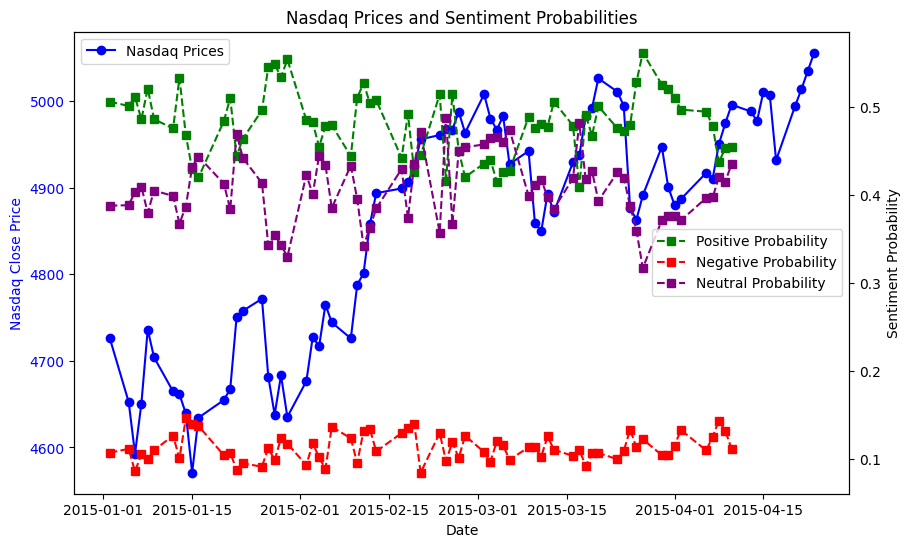

In [ ]:
merged_df['Date'] = pd.to_datetime(merged_df['Date']).dt.date

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Nasdaq prices on the left y-axis (ax1)
ax1.plot(merged_df['Date'], merged_df['Close'], color='blue', marker='o', label='Nasdaq Prices')
ax1.set_xlabel('Date')
ax1.set_ylabel('Nasdaq Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a second y-axis for sentiment probabilities
ax2 = ax1.twinx()

# Plot sentiment probabilities on the right y-axis (ax2)
ax2.plot(merged_df['Date'], merged_df['positive'], color='green', linestyle='dashed', marker='s', label='Positive Probability')
ax2.plot(merged_df['Date'], merged_df['negative'], color='red', linestyle='dashed', marker='s', label='Negative Probability')
ax2.plot(merged_df['Date'], merged_df['neutral'], color='purple', linestyle='dashed', marker='s', label='Neutral Probability')
ax2.set_ylabel('Sentiment Probability', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right')

# Add a title and legend
plt.title('Nasdaq Prices and Sentiment Probabilities')
plt.legend()


In [ ]:
first_month = merged_df[1:20]
second_month =merged_df[20:40]
third_month =merged_df[40:60]

In [ ]:
first_month['Date'] = pd.to_datetime(first_month['Date'])
first_month.set_index('Date', inplace=True)

# Calculate binary indicators for price and positive probability changes
first_month['price_change'] = first_month['Close'].diff()
first_month['positive_change'] = first_month['positive'].diff()
first_month['price_increase'] = (first_month['price_change'] > 0).astype(int)
first_month['positive_increase'] = (first_month['positive_change'] > 0).astype(int)
first_month['price_decrease'] = (first_month['price_change'] < 0).astype(int)
first_month['positive_decrease'] = (first_month['positive_change'] < 0).astype(int)

# Resample data to weekly frequency and calculate weekly aggregates
weekly_price_increase = first_month['price_increase'].resample('W').sum()
weekly_price_decrease = first_month['price_decrease'].resample('W').sum()
weekly_positive_increase = first_month['positive_increase'].resample('W').sum()
weekly_positive_decrease = first_month['positive_decrease'].resample('W').sum()

# Calculate correlations
correlation_increase = np.corrcoef(weekly_price_increase, weekly_positive_increase)[0, 1]
correlation_decrease = np.corrcoef(weekly_price_decrease, weekly_positive_decrease)[0, 1]
mix = np.corrcoef(weekly_price_increase, weekly_positive_decrease)[0, 1]
print(f"Correlation between Weekly Price Increase and Positive Probability Increase: {correlation_increase}")
print(f"Correlation between Weekly Price Decrease and Positive Probability Decrease: {correlation_decrease}")


In [ ]:
second_month['Date'] = pd.to_datetime(second_month['Date'])
second_month.set_index('Date', inplace=True)

# Calculate binary indicators for price and positive probability changes
second_month['price_change'] = second_month['Close'].diff()
second_month['positive_change'] = second_month['positive'].diff()
second_month['price_increase'] = (second_month['price_change'] > 0).astype(int)
second_month['positive_increase'] = (second_month['positive_change'] > 0).astype(int)
second_month['price_decrease'] = (second_month['price_change'] < 0).astype(int)
second_month['positive_decrease'] = (second_month['positive_change'] < 0).astype(int)

# Resample data to weekly frequency and calculate weekly aggregates
weekly_price_increase = second_month['price_increase'].resample('W').sum()
weekly_price_decrease = second_month['price_decrease'].resample('W').sum()
weekly_positive_increase = second_month['positive_increase'].resample('W').sum()
weekly_positive_decrease = second_month['positive_decrease'].resample('W').sum()

# Calculate correlations
correlation_increase = np.corrcoef(weekly_price_increase, weekly_positive_increase)[0, 1]
correlation_decrease = np.corrcoef(weekly_price_decrease, weekly_positive_decrease)[0, 1]
mix = np.corrcoef(weekly_price_increase, weekly_positive_decrease)[0, 1]
print(f"Correlation between Weekly Price Increase and Positive Probability Increase: {correlation_increase}")
print(f"Correlation between Weekly Price Decrease and Positive Probability Decrease: {correlation_decrease}")


In [ ]:
third_month['Date'] = pd.to_datetime(third_month['Date'])
third_month.set_index('Date', inplace=True)

# Calculate binary indicators for price and positive probability changes
third_month['price_change'] = third_month['Close'].diff()
third_month['positive_change'] = third_month['positive'].diff()
third_month['price_increase'] = (third_month['price_change'] > 0).astype(int)
third_month['positive_increase'] = (third_month['positive_change'] > 0).astype(int)
third_month['price_decrease'] = (third_month['price_change'] < 0).astype(int)
third_month['positive_decrease'] = (third_month['positive_change'] < 0).astype(int)

# Resample data to weekly frequency and calculate weekly aggregates
weekly_price_increase = third_month['price_increase'].resample('W').sum()
weekly_price_decrease = third_month['price_decrease'].resample('W').sum()
weekly_positive_increase = third_month['positive_increase'].resample('W').sum()
weekly_positive_decrease = third_month['positive_decrease'].resample('W').sum()

# Calculate correlations
correlation_increase = np.corrcoef(weekly_price_increase, weekly_positive_increase)[0, 1]
correlation_decrease = np.corrcoef(weekly_price_decrease, weekly_positive_decrease)[0, 1]
mix = np.corrcoef(weekly_price_increase, weekly_positive_decrease)[0, 1]
print(f"Correlation between Weekly Price Increase and Positive Probability Increase: {correlation_increase}")
print(f"Correlation between Weekly Price Decrease and Positive Probability Decrease: {correlation_decrease}")


# bow graph textblob

In [ ]:
nasdaq = nasdaq

In [ ]:
# Convert 'Date' column to datetime type
bow_textblob['Date'] = pd.to_datetime(bow_textblob['Date']).dt.date

# Group by 'Date' and 'sentiment_label' and calculate counts
grouped = bow_textblob.groupby(['Date', 'predicted_sentiment']).size().reset_index(name='count')

# Pivot the table to get sentiment labels as columns
pivot_table = grouped.pivot(index='Date', columns='predicted_sentiment', values='count').fillna(0)

# Calculate total counts for each day
pivot_table['total'] = pivot_table.sum(axis=1)

# Calculate daily probabilities for each sentiment label
predicted_sentiment = ['positive', 'negative', 'neutral']
for label in predicted_sentiment:
    pivot_table[label + '_prob'] = pivot_table[label] / pivot_table['total']

# Normalize probabilities to get an aggregated value from 0 to 1
normalized_probs = pivot_table[predicted_sentiment].div(pivot_table[predicted_sentiment].sum(axis=1), axis=0)

# Print the normalized probabilities
print(normalized_probs)

predicted_sentiment  positive  negative   neutral
Date                                             
2015-01-01           0.523077  0.073504  0.403419
2015-01-02           0.517094  0.070513  0.412393
2015-01-03           0.556439  0.057234  0.386328
2015-01-04           0.518970  0.036585  0.444444
2015-01-05           0.532774  0.053487  0.413739
...                       ...       ...       ...
2015-04-08           0.529459  0.063761  0.406780
2015-04-09           0.526512  0.063256  0.410233
2015-04-10           0.519966  0.053384  0.426650
2015-04-11           0.473846  0.043077  0.483077
2015-04-12           0.382022  0.008427  0.609551

[102 rows x 3 columns]


<ipython-input-291-b366444f95dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bow_textblob['Date'] = pd.to_datetime(bow_textblob['Date']).dt.date


In [ ]:
merged_df = pd.merge(nasdaq, normalized_probs, left_on='Date', right_index=True, how='left')
#merged_df

In [ ]:
merged_df = merged_df[:77]

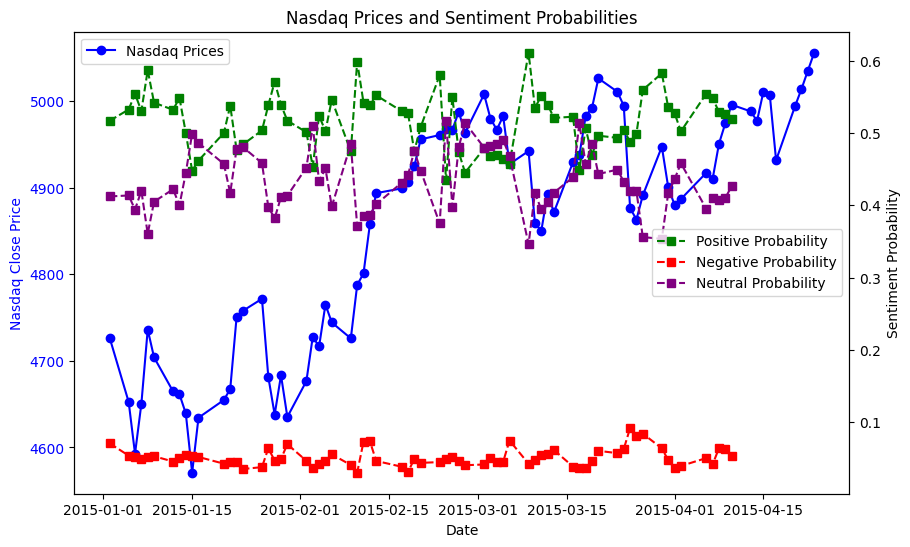

In [ ]:
merged_df['Date'] = pd.to_datetime(merged_df['Date']).dt.date

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Nasdaq prices on the left y-axis (ax1)
ax1.plot(merged_df['Date'], merged_df['Close'], color='blue', marker='o', label='Nasdaq Prices')
ax1.set_xlabel('Date')
ax1.set_ylabel('Nasdaq Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a second y-axis for sentiment probabilities
ax2 = ax1.twinx()

# Plot sentiment probabilities on the right y-axis (ax2)
ax2.plot(merged_df['Date'], merged_df['positive'], color='green', linestyle='dashed', marker='s', label='Positive Probability')
ax2.plot(merged_df['Date'], merged_df['negative'], color='red', linestyle='dashed', marker='s', label='Negative Probability')
ax2.plot(merged_df['Date'], merged_df['neutral'], color='purple', linestyle='dashed', marker='s', label='Neutral Probability')
ax2.set_ylabel('Sentiment Probability', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right')

# Add a title and legend
plt.title('Nasdaq Prices and Sentiment Probabilities')
plt.legend()


In [ ]:
first_month = merged_df[1:20]
second_month =merged_df[20:40]
third_month =merged_df[40:60]

In [ ]:
first_month

In [ ]:

first_month['Date'] = pd.to_datetime(first_month['Date'])
first_month.set_index('Date', inplace=True)

# Calculate binary indicators for price and positive probability changes
first_month['price_change'] = first_month['Close'].diff()
first_month['positive_change'] = first_month['positive'].diff()
first_month['price_increase'] = (first_month['price_change'] > 0).astype(int)
first_month['positive_increase'] = (first_month['positive_change'] > 0).astype(int)
first_month['price_decrease'] = (first_month['price_change'] < 0).astype(int)
first_month['positive_decrease'] = (first_month['positive_change'] < 0).astype(int)

# Resample data to weekly frequency and calculate weekly aggregates
weekly_price_increase = first_month['price_increase'].resample('W').sum()
weekly_price_decrease = first_month['price_decrease'].resample('W').sum()
weekly_positive_increase = first_month['positive_increase'].resample('W').sum()
weekly_positive_decrease = first_month['positive_decrease'].resample('W').sum()

# Calculate correlations
correlation_increase = np.corrcoef(weekly_price_increase, weekly_positive_increase)[0, 1]
correlation_decrease = np.corrcoef(weekly_price_decrease, weekly_positive_decrease)[0, 1]
mix = np.corrcoef(weekly_price_increase, weekly_positive_decrease)[0, 1]
print(f"Correlation between Weekly Price Increase and Positive Probability Increase: {correlation_increase}")
print(f"Correlation between Weekly Price Decrease and Positive Probability Decrease: {correlation_decrease}")


In [ ]:
second_month['Date'] = pd.to_datetime(second_month['Date'])
second_month.set_index('Date', inplace=True)

# Calculate binary indicators for price and positive probability changes
second_month['price_change'] = second_month['Close'].diff()
second_month['positive_change'] = second_month['positive'].diff()
second_month['price_increase'] = (second_month['price_change'] > 0).astype(int)
second_month['positive_increase'] = (second_month['positive_change'] > 0).astype(int)
second_month['price_decrease'] = (second_month['price_change'] < 0).astype(int)
second_month['positive_decrease'] = (second_month['positive_change'] < 0).astype(int)

# Resample data to weekly frequency and calculate weekly aggregates
weekly_price_increase = second_month['price_increase'].resample('W').sum()
weekly_price_decrease = second_month['price_decrease'].resample('W').sum()
weekly_positive_increase = second_month['positive_increase'].resample('W').sum()
weekly_positive_decrease = second_month['positive_decrease'].resample('W').sum()

# Calculate correlations
correlation_increase = np.corrcoef(weekly_price_increase, weekly_positive_increase)[0, 1]
correlation_decrease = np.corrcoef(weekly_price_decrease, weekly_positive_decrease)[0, 1]
mix = np.corrcoef(weekly_price_increase, weekly_positive_decrease)[0, 1]
print(f"Correlation between Weekly Price Increase and Positive Probability Increase: {correlation_increase}")
print(f"Correlation between Weekly Price Decrease and Positive Probability Decrease: {correlation_decrease}")



In [ ]:
third_month['Date'] = pd.to_datetime(third_month['Date'])
third_month.set_index('Date', inplace=True)

# Calculate binary indicators for price and positive probability changes
third_month['price_change'] = third_month['Close'].diff()
third_month['positive_change'] = third_month['positive'].diff()
third_month['price_increase'] = (third_month['price_change'] > 0).astype(int)
third_month['positive_increase'] = (third_month['positive_change'] > 0).astype(int)
third_month['price_decrease'] = (third_month['price_change'] < 0).astype(int)
third_month['positive_decrease'] = (third_month['positive_change'] < 0).astype(int)

# Resample data to weekly frequency and calculate weekly aggregates
weekly_price_increase = third_month['price_increase'].resample('W').sum()
weekly_price_decrease = third_month['price_decrease'].resample('W').sum()
weekly_positive_increase = third_month['positive_increase'].resample('W').sum()
weekly_positive_decrease = third_month['positive_decrease'].resample('W').sum()

# Calculate correlations
correlation_increase = np.corrcoef(weekly_price_increase, weekly_positive_increase)[0, 1]
correlation_decrease = np.corrcoef(weekly_price_decrease, weekly_positive_decrease)[0, 1]
mix = np.corrcoef(weekly_price_increase, weekly_positive_decrease)[0, 1]
print(f"Correlation between Weekly Price Increase and Positive Probability Increase: {correlation_increase}")
print(f"Correlation between Weekly Price Decrease and Positive Probability Decrease: {correlation_decrease}")


Correlation between Weekly Price Increase and Positive Probability Increase: 0.5773502691896258
Correlation between Weekly Price Decrease and Positive Probability Decrease: 0.6123724356957946


<ipython-input-328-85712e0e4851>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  third_month['Date'] = pd.to_datetime(third_month['Date'])
<ipython-input-328-85712e0e4851>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  third_month['price_change'] = third_month['Close'].diff()
<ipython-input-328-85712e0e4851>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import TimeSeriesSplit

# Assuming you have a DataFrame named 'first_week' with columns 'Date', 'positive_increase', and 'price_increase'.
# Ensure that 'Date' is in datetime format.

# Set 'Date' as the index
#first_week['Date'] = pd.to_datetime(first_week['Date'])
#first_week.set_index('Date', inplace=True)

# Features (positive sentiment increases) and target variable (price increases)
X = first_week['positive_increase'].values.reshape(-1, 1)
y = first_week['price_increase'].values

# Initialize a time series cross-validator
tscv = TimeSeriesSplit(n_splits=5)  # Adjust the number of splits as needed

# Initialize a list to store evaluation results for each fold
results = []

# Perform time series cross-validation
for train_index, test_index in tscv.split(X):
    # Split the data into training and testing sets based on the fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize and train a logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Store the evaluation results for this fold
    results.append({
        'Accuracy': accuracy,
        'Classification Report': report
    })

# Print the evaluation results for each fold
for i, result in enumerate(results, start=1):
    print(f"Fold {i}:")
    print("Accuracy:", result['Accuracy'])
    print("Classification Report:\n", result['Classification Report'])
    print("-" * 50)

# You can also compute the average performance metrics across all folds if needed
avg_accuracy = np.mean([result['Accuracy'] for result in results])
avg_report = classification_report(y, np.concatenate([model.predict(X_test) for _, X_test in tscv.split(X)]))

print("Average Accuracy:", avg_accuracy)
print("Average Classification Report:\n", avg_report)


In [ ]:
# Assuming you have a DataFrame named 'second_week' with the same structure as 'first_week' but for the second week.
# Ensure that 'Date' is in datetime format.

# Set 'Date' as the index
#first_week['Date'] = pd.to_datetime(first_week['Date'])
#first_week.set_index('Date', inplace=True)

# Features (positive sentiment increases) for the second week
X_new = first_week['positive_increase'].values.reshape(-1, 1)

# Initialize and train a logistic regression model (you can use the best model from cross-validation)
best_model = LogisticRegression()
best_model.fit(X, y)

# Make predictions for the second week
predictions = best_model.predict(X_new)

# Interpret the predictions (1 for increase, 0 for decrease)
if predictions[0] == 1:
    result = "up"
else:
    result = "down"

# Print the result
print("Second week is predicted to go", result)


Second week is predicted to go down


In [ ]:
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame named 'second_week_actual' with 'price_increase' column.
# Ensure that 'Date' is in datetime format.

# Calculate the true labels for the second week
y_true = first_week['price_increase'].values

# Calculate accuracy by comparing the predicted labels (predictions) with true labels (y_true)
accuracy = accuracy_score(y_true, predictions)

print("Accuracy for predicting the second week:", accuracy)


Accuracy for predicting the second week: 0.6


In [ ]:
first_week

In [ ]:
second_month

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming you have DataFrames 'first_month' and 'second_month' with appropriate columns.
# Ensure that 'Date' is in datetime format and set as the index.

# Select features from the first month
features = ['price_increase',	'positive_increase',	'price_decrease',	'positive_decrease']  # Add other features as needed

# Split the first month data into features (X) and target (y)
X_train = first_month[features]
y_train = first_month['price_increase']

# Initialize and train a logistic regression model (you can choose another model)
model = LogisticRegression()
model.fit(X_train, y_train)

# Use the model to predict price direction for the second month
X_test = second_month[features]
y_pred = model.predict(X_test)

# Calculate accuracy by comparing predicted labels to actual price movement in the second month
# Assuming 'second_month_actual' contains the actual price movement direction
y_pred



array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

# Embed

In [ ]:
combined_df = pd.concat([textblob['Date'],bow_vader['predicted_sentiment'],bow_textblob['predicted_sentiment'],textblob['sentiment_label'],vader['sentiment_label']], axis=1)

In [ ]:
combined_df['combined_sentiment'] = combined_df.mode(axis=1)[0]

In [ ]:
combined_df[:210000]
result_df = combined_df[:210000]

In [ ]:
# Convert 'Date' column to datetime type
result_df['Date'] = pd.to_datetime(result_df['Date']).dt.date

# Group by 'Date' and 'sentiment_label' and calculate counts
grouped = result_df.groupby(['Date', 'combined_sentiment']).size().reset_index(name='count')

# Pivot the table to get sentiment labels as columns
pivot_table = grouped.pivot(index='Date', columns='combined_sentiment', values='count').fillna(0)

# Calculate total counts for each day
pivot_table['total'] = pivot_table.sum(axis=1)

# Calculate daily probabilities for each sentiment label
combined_sentiment = ['positive', 'negative', 'neutral']
for label in combined_sentiment:
    pivot_table[label + '_prob'] = pivot_table[label] / pivot_table['total']

# Normalize probabilities to get an aggregated value from 0 to 1
normalized_probs = pivot_table[combined_sentiment].div(pivot_table[combined_sentiment].sum(axis=1), axis=0)

#merged_df = pd.merge(nasdaq, normalized_probs, left_on='Date', right_index=True, how='left')


In [ ]:
normalized_probs

In [ ]:
nasdaq = nasdaq[:67]

In [ ]:
merged_df = pd.merge(nasdaq, normalized_probs, left_on='Date', right_index=True, how='left')
merged_df

In [ ]:
merged_df = merged_df[:77]

<ipython-input-158-e21779133334>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Date'] = pd.to_datetime(merged_df['Date']).dt.date


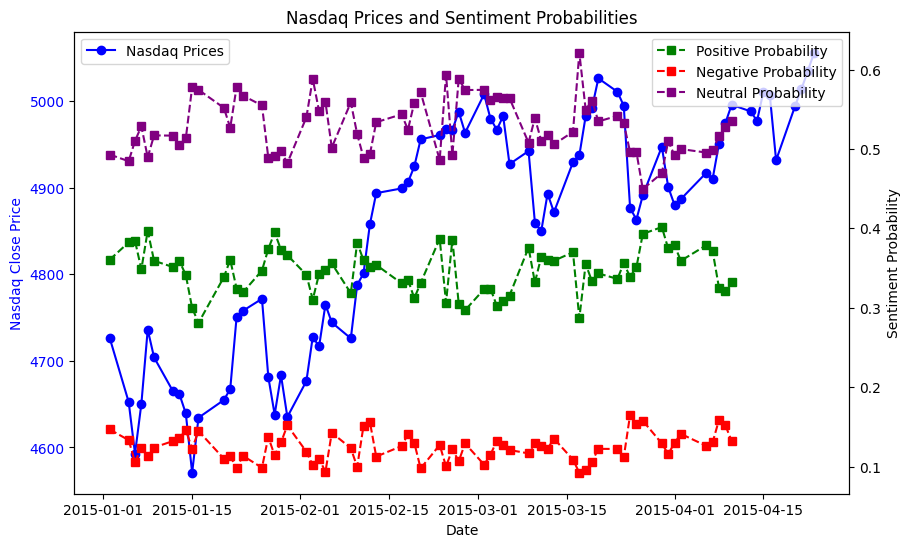

In [ ]:
merged_df['Date'] = pd.to_datetime(merged_df['Date']).dt.date

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Nasdaq prices on the left y-axis (ax1)
ax1.plot(merged_df['Date'], merged_df['Close'], color='blue', marker='o', label='Nasdaq Prices')
ax1.set_xlabel('Date')
ax1.set_ylabel('Nasdaq Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a second y-axis for sentiment probabilities
ax2 = ax1.twinx()

# Plot sentiment probabilities on the right y-axis (ax2)
ax2.plot(merged_df['Date'], merged_df['positive'], color='green', linestyle='dashed', marker='s', label='Positive Probability')
ax2.plot(merged_df['Date'], merged_df['negative'], color='red', linestyle='dashed', marker='s', label='Negative Probability')
ax2.plot(merged_df['Date'], merged_df['neutral'], color='purple', linestyle='dashed', marker='s', label='Neutral Probability')
ax2.set_ylabel('Sentiment Probability', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right')

# Add a title and legend
plt.title('Nasdaq Prices and Sentiment Probabilities')
plt.legend()


In [ ]:
first_month = merged_df[1:20]
second_month =merged_df[20:40]
third_month =merged_df[40:60]

In [ ]:


first_month['Date'] = pd.to_datetime(first_month['Date'])
first_month.set_index('Date', inplace=True)

# Calculate binary indicators for price and positive probability changes
first_month['price_change'] = first_month['Close'].diff()
first_month['positive_change'] = first_month['positive'].diff()
first_month['price_increase'] = (first_month['price_change'] > 0).astype(int)
first_month['positive_increase'] = (first_month['positive_change'] > 0).astype(int)
first_month['price_decrease'] = (first_month['price_change'] < 0).astype(int)
first_month['positive_decrease'] = (first_month['positive_change'] < 0).astype(int)

# Resample data to weekly frequency and calculate weekly aggregates
weekly_price_increase = first_month['price_increase'].resample('W').sum()
weekly_price_decrease = first_month['price_decrease'].resample('W').sum()
weekly_positive_increase = first_month['positive_increase'].resample('W').sum()
weekly_positive_decrease = first_month['positive_decrease'].resample('W').sum()

# Calculate correlations
correlation_increase = np.corrcoef(weekly_price_increase, weekly_positive_increase)[0, 1]
correlation_decrease = np.corrcoef(weekly_price_decrease, weekly_positive_decrease)[0, 1]
mix = np.corrcoef(weekly_price_increase, weekly_positive_decrease)[0, 1]
print(f"Correlation between Weekly Price Increase and Positive Probability Increase: {correlation_increase}")
print(f"Correlation between Weekly Price Decrease and Positive Probability Decrease: {correlation_decrease}")


In [ ]:
second_month['Date'] = pd.to_datetime(second_month['Date'])
second_month.set_index('Date', inplace=True)

# Calculate binary indicators for price and positive probability changes
second_month['price_change'] = second_month['Close'].diff()
second_month['positive_change'] = second_month['positive'].diff()
second_month['price_increase'] = (second_month['price_change'] > 0).astype(int)
second_month['positive_increase'] = (second_month['positive_change'] > 0).astype(int)
second_month['price_decrease'] = (second_month['price_change'] < 0).astype(int)
second_month['positive_decrease'] = (second_month['positive_change'] < 0).astype(int)

# Resample data to weekly frequency and calculate weekly aggregates
weekly_price_increase = second_month['price_increase'].resample('W').sum()
weekly_price_decrease = second_month['price_decrease'].resample('W').sum()
weekly_positive_increase = second_month['positive_increase'].resample('W').sum()
weekly_positive_decrease = second_month['positive_decrease'].resample('W').sum()

# Calculate correlations
correlation_increase = np.corrcoef(weekly_price_increase, weekly_positive_increase)[0, 1]
correlation_decrease = np.corrcoef(weekly_price_decrease, weekly_positive_decrease)[0, 1]
mix = np.corrcoef(weekly_price_increase, weekly_positive_decrease)[0, 1]
print(f"Correlation between Weekly Price Increase and Positive Probability Increase: {correlation_increase}")
print(f"Correlation between Weekly Price Decrease and Positive Probability Decrease: {correlation_decrease}")


In [ ]:

third_month['Date'] = pd.to_datetime(third_month['Date'])
third_month.set_index('Date', inplace=True)

# Calculate binary indicators for price and positive probability changes
third_month['price_change'] = third_month['Close'].diff()
third_month['positive_change'] = third_month['positive'].diff()
third_month['price_increase'] = (third_month['price_change'] > 0).astype(int)
third_month['positive_increase'] = (third_month['positive_change'] > 0).astype(int)
third_month['price_decrease'] = (third_month['price_change'] < 0).astype(int)
third_month['positive_decrease'] = (third_month['positive_change'] < 0).astype(int)

# Resample data to weekly frequency and calculate weekly aggregates
weekly_price_increase = third_month['price_increase'].resample('W').sum()
weekly_price_decrease = third_month['price_decrease'].resample('W').sum()
weekly_positive_increase = third_month['positive_increase'].resample('W').sum()
weekly_positive_decrease = third_month['positive_decrease'].resample('W').sum()

# Calculate correlations
correlation_increase = np.corrcoef(weekly_price_increase, weekly_positive_increase)[0, 1]
correlation_decrease = np.corrcoef(weekly_price_decrease, weekly_positive_decrease)[0, 1]
mix = np.corrcoef(weekly_price_increase, weekly_positive_decrease)[0, 1]
print(f"Correlation between Weekly Price Increase and Positive Probability Increase: {correlation_increase}")
print(f"Correlation between Weekly Price Decrease and Positive Probability Decrease: {correlation_decrease}")


# topic modelling

In [ ]:
textblob

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora, models

In [ ]:

# Assuming you have a DataFrame named 'textblob_df' with a 'preprocessed_text' column
preprocessed_documents = [text.split() for text in textblob['preprocessed_text'].tolist()]

# Create a dictionary of terms
dictionary = corpora.Dictionary(preprocessed_documents)

# Convert the document-term matrix to a list of lists (corpus format used by gensim)
corpus = [dictionary.doc2bow(doc) for doc in preprocessed_documents]

# Train an LDA model on the corpus
num_topics = 5  # Specify the number of topics you want to uncover
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary)


In [ ]:
# Print the top words for each topic
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)


(0, '0.030*"amzn" + 0.027*"october" + 0.027*"stock" + 0.017*"httpamazoncom" + 0.015*"goog" + 0.013*"pick" + 0.011*"new" + 0.010*"check" + 0.009*"month" + 0.008*"msft"')
(1, '0.067*"aapl" + 0.057*"apple" + 0.023*"msft" + 0.016*"goog" + 0.013*"google" + 0.012*"tesla" + 0.012*"tsla" + 0.011*"iphone" + 0.011*"microsoft" + 0.010*"new"')
(2, '0.064*"aapl" + 0.027*"tsla" + 0.013*"2015" + 0.011*"amzn" + 0.011*"stock" + 0.010*"updated" + 0.009*"today" + 0.008*"market" + 0.006*"googl" + 0.006*"like"')
(3, '0.048*"stock" + 0.047*"inc" + 0.029*"googl" + 0.025*"goog" + 0.024*"investing" + 0.022*"amzn" + 0.021*"aapl" + 0.021*"share" + 0.017*"nasdaq" + 0.015*"finance"')
(4, '0.052*"fb" + 0.050*"aapl" + 0.025*"trading" + 0.023*"twtr" + 0.022*"tsla" + 0.020*"nflx" + 0.019*"amzn" + 0.016*"goog" + 0.015*"httpinvestwallcom" + 0.012*"qqq"')


In [ ]:
from gensim import models

# Assuming you have a trained LDA model named 'lda_model'
num_initial_topics = 5  # Number of initial topics you've already seen
num_next_best_topics = 15  # Number of next best topics you want to retrieve

# Retrieve the next best topics
next_best_topics = lda_model.show_topics(num_topics=num_next_best_topics, num_words=10, formatted=False)

# Print the next best topics
for topic_id, topic_words in next_best_topics:
    print(f"Topic {topic_id}: {' '.join([word for word, _ in topic_words])}")


Topic 0: amzn october stock httpamazoncom goog pick new check month msft
Topic 1: aapl apple msft goog google tesla tsla iphone microsoft new
Topic 2: aapl tsla 2015 amzn stock updated today market googl like
Topic 3: stock inc googl goog investing amzn aapl share nasdaq finance
Topic 4: fb aapl trading twtr tsla nflx amzn goog httpinvestwallcom qqq
